In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
%store -r df

    internal_node_id responses       rt  time_elapsed  trial_index  \
145        0.0-140.0       NaN  11922.0       1161415          140   
229        0.0-224.0       NaN  36301.0       2465211          224   
331        0.0-326.0       NaN    881.0       5037188          326   
349        0.0-344.0       NaN    472.0       5251843          344   
385        0.0-380.0       NaN   1314.0      20812430          380   
449        0.0-444.0       NaN   1055.0      21459954          444   
528         0.0-76.0       NaN   1328.4        793118           76   
667        0.0-124.0       NaN    467.0        485952          124   
683        0.0-140.0       NaN   2627.0        538557          140   
711        0.0-168.0       NaN   1311.0        640337          168   
901        0.0-358.0       NaN   1549.0       1352919          358   
931        0.0-388.0       NaN   1491.0       1464160          388   
973        0.0-430.0       NaN   2043.0       1620683          430   
105        0.0-100.0

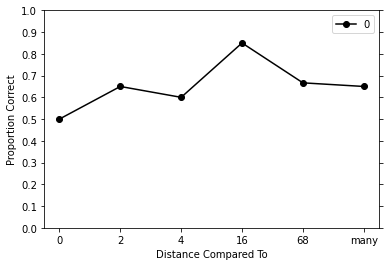

[0.65, 0.5, 0.35, 0.65, 0.75, 0.65]


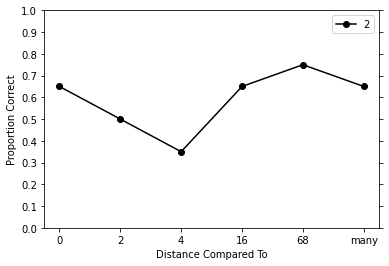

[0.6, 0.35, 0.5, 0.5714285714285714, 0.65, 0.55]


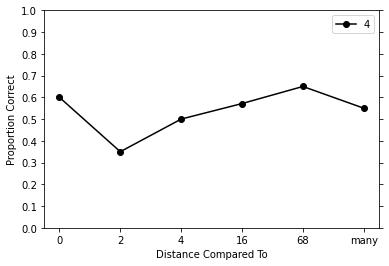

[0.85, 0.65, 0.5714285714285714, 0.5, 0.65, 0.7]


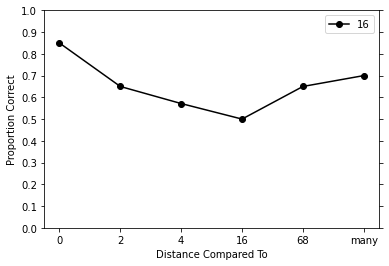

    internal_node_id responses       rt  time_elapsed  trial_index  \
145        0.0-140.0       NaN  11922.0       1161415          140   
229        0.0-224.0       NaN  36301.0       2465211          224   
331        0.0-326.0       NaN    881.0       5037188          326   
349        0.0-344.0       NaN    472.0       5251843          344   
385        0.0-380.0       NaN   1314.0      20812430          380   
449        0.0-444.0       NaN   1055.0      21459954          444   
528         0.0-76.0       NaN   1328.4        793118           76   
667        0.0-124.0       NaN    467.0        485952          124   
683        0.0-140.0       NaN   2627.0        538557          140   
711        0.0-168.0       NaN   1311.0        640337          168   
901        0.0-358.0       NaN   1549.0       1352919          358   
931        0.0-388.0       NaN   1491.0       1464160          388   
973        0.0-430.0       NaN   2043.0       1620683          430   
105        0.0-100.0

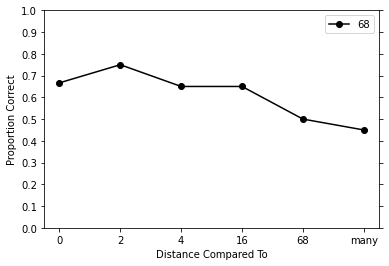

[0.65, 0.65, 0.55, 0.7, 0.45, 0.5]


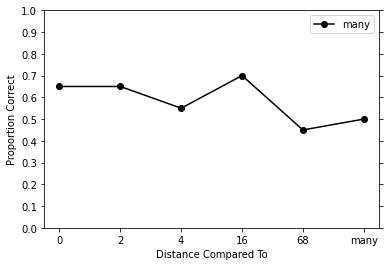

In [7]:
comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
distances = [0, 2, 4, 16, 68, 'many']

def average_for_comp(df, comp):
    ordered = df[df['left_comp_type'] == comp[0]]
    ordered = ordered[ordered['right_comp_type'] == comp[1]]
    inverse = df[df['left_comp_type'] == comp[1]]
    inverse = inverse[inverse['right_comp_type'] == comp[0]]
    temp = pd.concat([ordered, inverse])
    corr = temp[temp['correct_side'] == temp['chosen_side']]
    proportion = (len(corr)) / len(temp)
    if comp == [0, 68]:
        print(temp)
    return proportion

def graph_for_distance(distance, comparisons, distances, df):
    # for each comparison for this distance (i.e. 4 and 16) add the average to the y array in order (FOR COMP = DISTANCE, set to 0.5)
    y = []
    for i in range(len(distances)):
        if distances[i] == distance:
            y.append(0.5)
        elif i > distances.index(distance):
            y.append(average_for_comp(df, [distance, distances[i]]))
        else:
            y.append(average_for_comp(df, [distances[i], distance]))
    x = distances
    print(y)

    # graph the line:
    colors = ['black', 'red', 'green', 'blue', 'yellow', 'orange']
    color = colors[distances.index(distance)]
    color = 'black' #TODO if don't want, remove

    # Set up graph
    # TEMPORARY SET UP
    fig, ax = plt.subplots()
    #plt.title('Cross Category Recency Judgements')
    plt.ylabel('Proportion Correct')
    plt.xlabel('Distance Compared To')
    plt.xticks(range(0, len(distances)))
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0,1,11))
    ax.yaxis.set_ticks_position('both')
    ax.plot(x, y, clip_on = False, color = color, marker = 'o', label=distance)
    plt.legend()
    plt.show()

for i in distances:
    graph_for_distance(i, comparisons, distances, df)